In [1]:
# Garrett Lawson, 2023
# MATH381

import random
import math
import numpy as np
import matplotlib.pyplot as plt

class Player:
    
    def __init__(self, score):
        self.score = score
        
WIN_SCORE = 30
MAX_TURNS = 30

numPlayers = 2 # Two player game. We could potentially change the game to include more than two
                # players but the current code only supports two.
numGames = 100000
numTrials = 10

Player0WRs = np.zeros(numTrials)
#simRates = np.zeros((numTrials, int(numGames/100)-1)) # make sure numGames divisible by 100

for trial in range(numTrials):

    wins = np.zeros(numPlayers)
    
    for game in range(numGames): # game loop

        ### initialize players
        players = []
        for i in range(numPlayers):
            players.append(Player(0))

        #### Start playing the game
        currentTurn = 1
        currentPlayer = game % numPlayers ### start with a different player each time
        #print("Scores: [0, 0]")
        while(currentTurn<=MAX_TURNS):

            # each player takes a turn
            # roll the die
            dieRoll = random.randint(1, 6)
            #print("Player " + str(currentPlayer) + " rolls a " + str(dieRoll))

            # Player either adds to their score or subtracts from opponent's score
            if (currentPlayer in [0]):
                # Strategy for this player: 
                # Always add
                players[0].score+=dieRoll

            if (currentPlayer in [1]):
                # Strategy for this player: 
                # Always add 
                players[1].score+=dieRoll

            # print the scores for each turn
            #print("Scores: [" + str(players[0].score) + ", " + str(players[1].score) + "]")

            # If the current player has reached the goal score, they win   
            if (players[currentPlayer].score>=WIN_SCORE):
                wins[currentPlayer]+=1
                #print("Player " + str(currentPlayer) + " wins!")
                #print("Scores: [" + str(players[0].score) + ", " + str(players[1].score) + "]")
                break
            elif (currentTurn==MAX_TURNS): # If we reach max turns, whoever has higher score wins
                if (players[0].score>players[1].score):
                    wins[0]+=1
                elif (players[1].score>players[0].score):
                    wins[1]+=1
                else:
                    wins[0]+=0.5
                    wins[1]+=0.5
                break

            # next turn
            currentPlayer = (currentPlayer+1) % numPlayers
            currentTurn += 1

        ## game is over

        # print win probability for player 0 every so often
        #if ((game % 10000==0) and (game>0)):
         #   print(wins[0]*1./game)
            
        """if ((game % 100==0) and (game>0)):
            simRates[trial][int(game/100)-1] = wins[0]*1./(game+1)"""
            

    ## output win percentage for all players
    """print("-------------------")
    print("Stats Over All Games")

    print(wins)        

    for i in range(numPlayers):
        print(i, " ", wins[i]*1./numGames)"""
    
    Player0WRs[trial] = wins[0]*1./numGames

print(Player0WRs)

[0.50191 0.50081 0.50031 0.49922 0.49887 0.50044 0.49881 0.49997 0.49869
 0.50007]


In [2]:
print(max(Player0WRs))
print(min(Player0WRs))

0.50191
0.49869


In [48]:
"""for i in range(numTrials):
    plt.plot(simRates[i])
plt.show()"""

'for i in range(numTrials):\n    plt.plot(simRates[i])\nplt.show()'

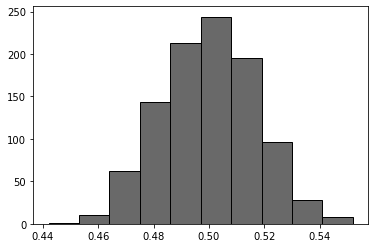

In [68]:
"""counts, bins = np.histogram(Player0WRs)
plt.hist(bins[:-1], bins, weights=counts, histtype='bar', edgecolor='k', color='dimgray')
plt.show()"""